# Coronavirus Disease (COVID-19)

Data Source: https://github.com/owid/covid-19-data/tree/master/public/data/

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [20, 20]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join('datasets', 'owid-covid-data.csv')
df = pd.read_csv(filepath)

# Head and Tail

In [4]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165175,ZWE,Africa,Zimbabwe,2022-02-24,234967.0,378.0,338.429,5390.0,2.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
165176,ZWE,Africa,Zimbabwe,2022-02-25,235467.0,500.0,348.143,5392.0,2.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
165177,ZWE,Africa,Zimbabwe,2022-02-26,235803.0,336.0,368.429,5393.0,1.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
165178,ZWE,Africa,Zimbabwe,2022-02-27,235803.0,0.0,350.143,5393.0,0.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [5]:
df.shape

(165180, 67)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165180 entries, 0 to 165179
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    165180 non-null  object 
 1   continent                                   155289 non-null  object 
 2   location                                    165180 non-null  object 
 3   date                                        165180 non-null  object 
 4   total_cases                                 162150 non-null  float64
 5   new_cases                                   162099 non-null  float64
 6   new_cases_smoothed                          160948 non-null  float64
 7   total_deaths                                144355 non-null  float64
 8   new_deaths                                  144509 non-null  float64
 9   new_deaths_smoothed                         144379 non-null  float64
 

In [7]:
df['date'] = pd.to_datetime(df['date'])                   # convert date to pandas datetime

In [8]:
df['day_name'] = df['date'].dt.day_name()                 # add name of the day
df['day'] = df['date'].dt.day                             # day
df['month'] = df['date'].dt.month                         # add month
df['year'] =  df['date'].dt.year                          # year
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,day_name,day,month,year
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,64.83,0.511,NaN,NaN,NaN,NaN,Monday,24,2,2020
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,64.83,0.511,NaN,NaN,NaN,NaN,Tuesday,25,2,2020
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,64.83,0.511,NaN,NaN,NaN,NaN,Wednesday,26,2,2020
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,64.83,0.511,NaN,NaN,NaN,NaN,Thursday,27,2,2020
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,64.83,0.511,NaN,NaN,NaN,NaN,Friday,28,2,2020


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165180 entries, 0 to 165179
Data columns (total 71 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    165180 non-null  object        
 1   continent                                   155289 non-null  object        
 2   location                                    165180 non-null  object        
 3   date                                        165180 non-null  datetime64[ns]
 4   total_cases                                 162150 non-null  float64       
 5   new_cases                                   162099 non-null  float64       
 6   new_cases_smoothed                          160948 non-null  float64       
 7   total_deaths                                144355 non-null  float64       
 8   new_deaths                                  144509 non-null  float64      

# Exploratory Data Analysis

In [10]:
from matplotlib.ticker import FuncFormatter

# helper function for formatting y-axis in thousands
def thousand(x, pos):
    'the two arguments are the value and tick position' 
    return '%1.1fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)

# helper function for formatting y-axis in millions
def million(x, pos):
    'the two arguments are the value and tick position' 
    return '%1.1fM' % (x * 1e-6)

format_mill = FuncFormatter(million)

[Text(0, 0.5, 'new_deaths'), Text(0.5, 1.0, 'New deaths per day')]

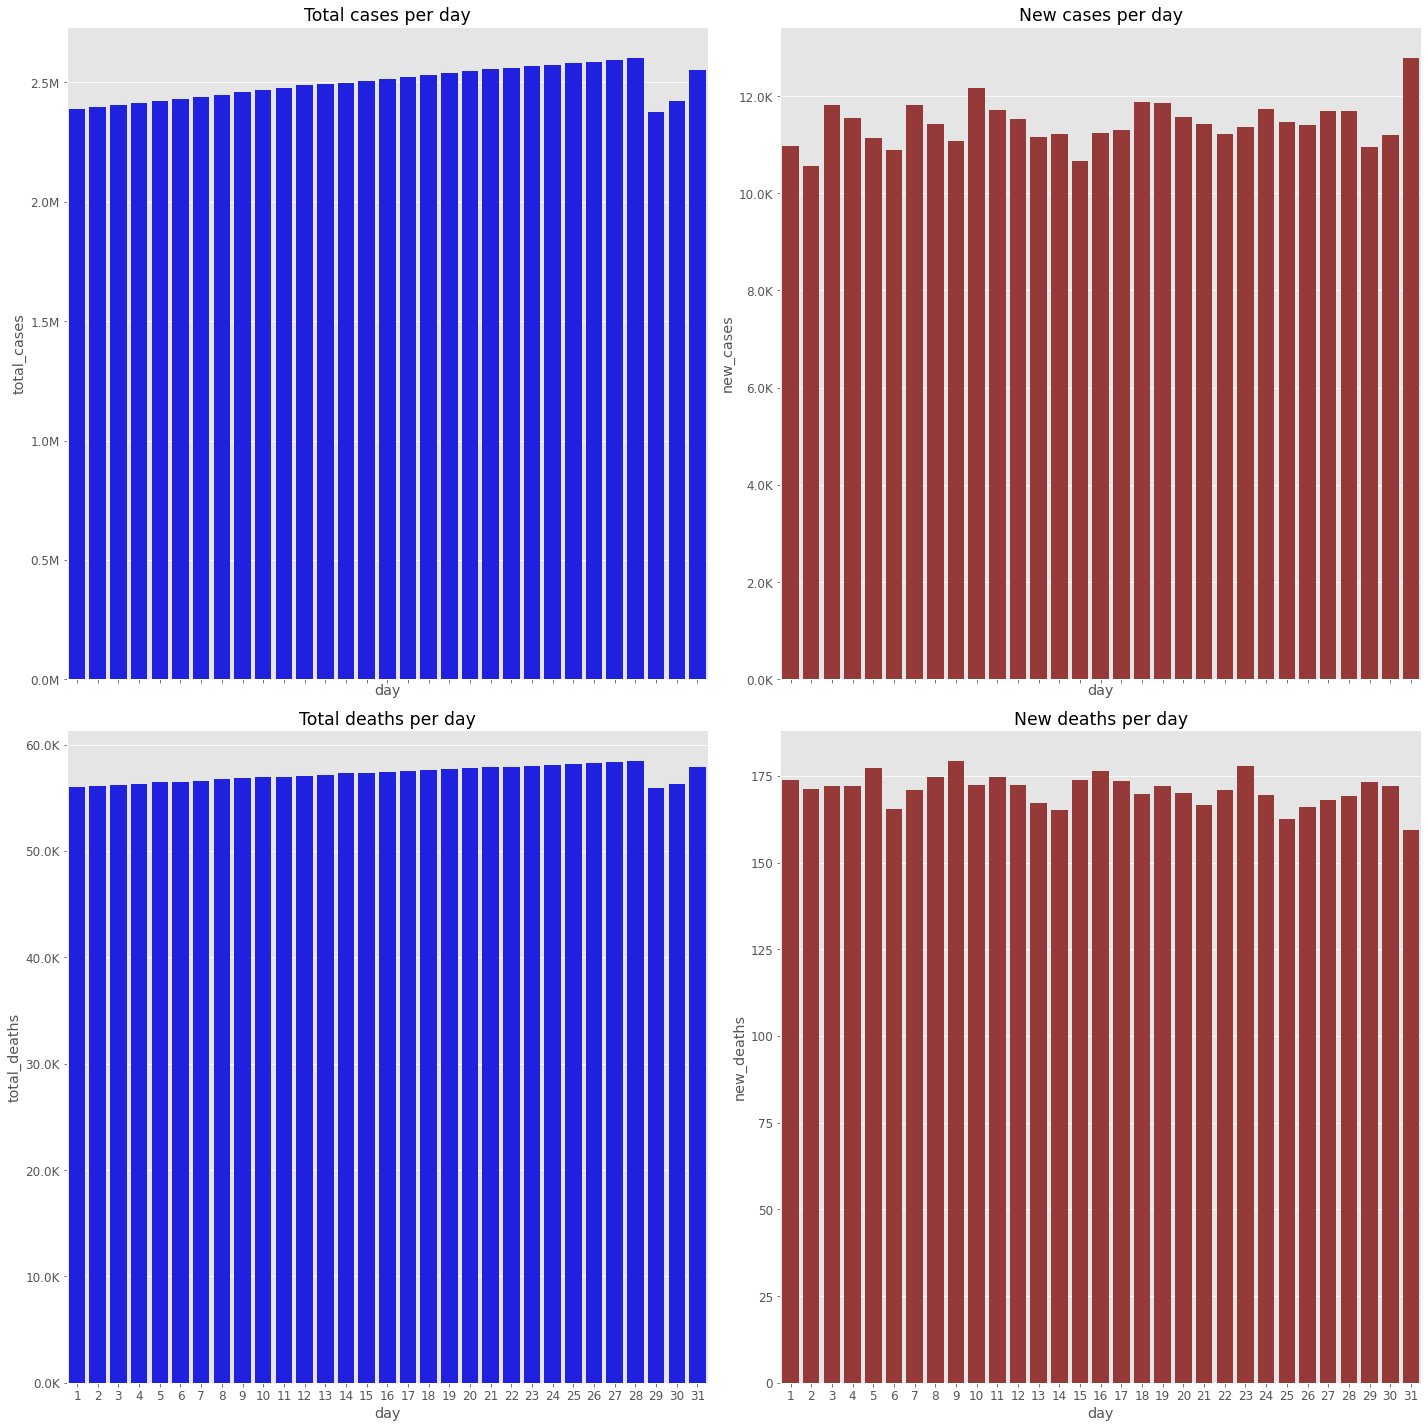

In [11]:
# initiate matplot figure and axis
figxd, ((axx1, axx2), (axx3, axx4)) = plt.subplots(2, 2, sharex=True)

# create bar charts of total cases per day
sns.barplot(x='day', y='total_cases', color='blue', ci=None, data=df, ax=axx1)
axx1.set(ylabel='total_cases', title='Total cases per day')
axx1.yaxis.set_major_formatter(format_mill)

# create bar charts of new cases per day
sns.barplot(x='day', y='new_cases', color='brown', ci=None, data=df, ax=axx2)
axx2.set(ylabel='new_cases', title='New cases per day')
axx2.yaxis.set_major_formatter(format_tsd)

# create bar charts of total deaths per day
sns.barplot(x='day', y='total_deaths', color='blue', ci=None, data=df, ax=axx3)
axx3.set(ylabel='total_deaths', title='Total deaths per day')
axx3.yaxis.set_major_formatter(format_tsd)

# create bar charts of new deaths per day
sns.barplot(x='day', y='new_deaths', color='brown', ci=None, data=df, ax=axx4)
axx4.set(ylabel='new_deaths', title='New deaths per day')

[Text(0, 0.5, 'new_deaths'), Text(0.5, 1.0, 'New deaths per month')]

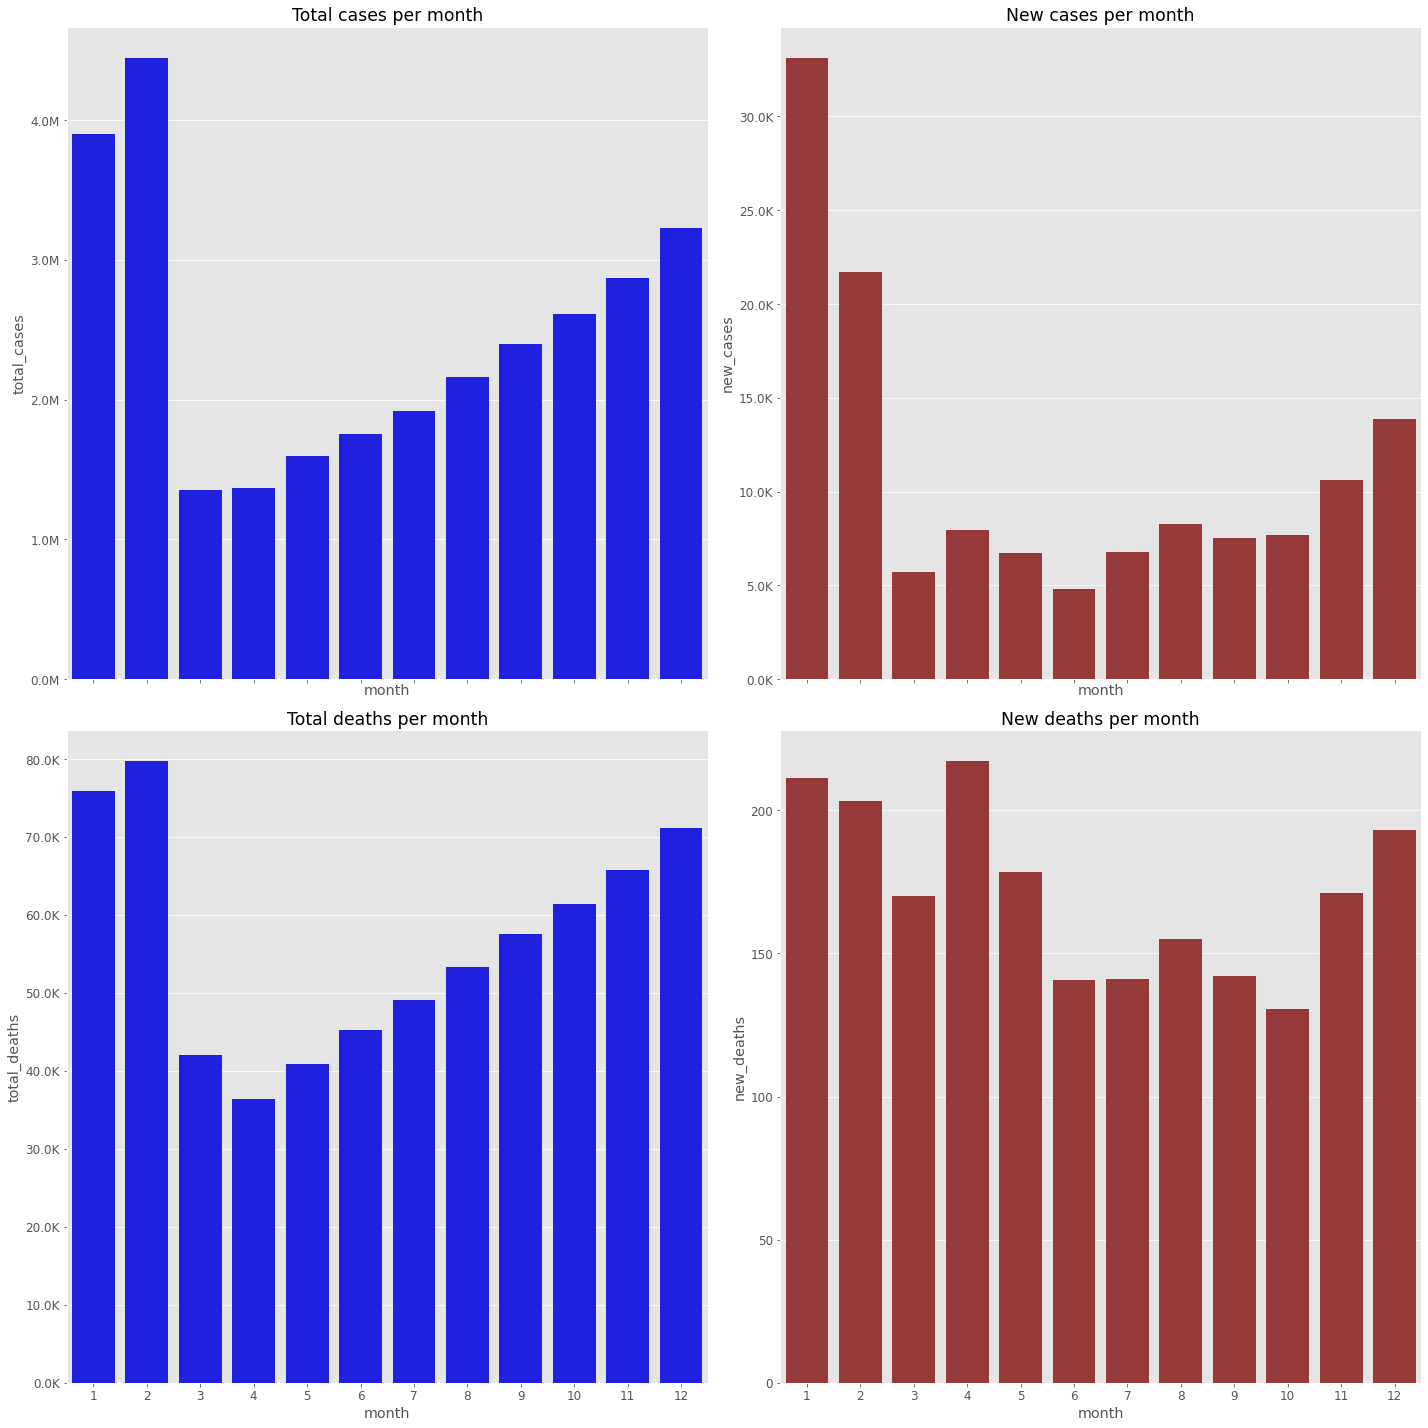

In [12]:
# initiate matplot figure and axis
figxm, ((axx1, axx2), (axx3, axx4)) = plt.subplots(2, 2, sharex=True)

# create bar charts of total cases per month
sns.barplot(x='month', y='total_cases', color='blue', ci=None, data=df, ax=axx1)
axx1.set(ylabel='total_cases', title='Total cases per month')
axx1.yaxis.set_major_formatter(format_mill)

# create bar charts of new cases per month
sns.barplot(x='month', y='new_cases', color='brown', ci=None, data=df, ax=axx2)
axx2.set(ylabel='new_cases', title='New cases per month')
axx2.yaxis.set_major_formatter(format_tsd)

# create bar charts of total deaths per month
sns.barplot(x='month', y='total_deaths', color='blue', ci=None, data=df, ax=axx3)
axx3.set(ylabel='total_deaths', title='Total deaths per month')
axx3.yaxis.set_major_formatter(format_tsd)

# create bar charts new of deaths per month
sns.barplot(x='month', y='new_deaths', color='brown', ci=None, data=df, ax=axx4)
axx4.set(ylabel='new_deaths', title='New deaths per month')

[Text(0, 0.5, 'new_deaths'), Text(0.5, 1.0, 'New deaths per year')]

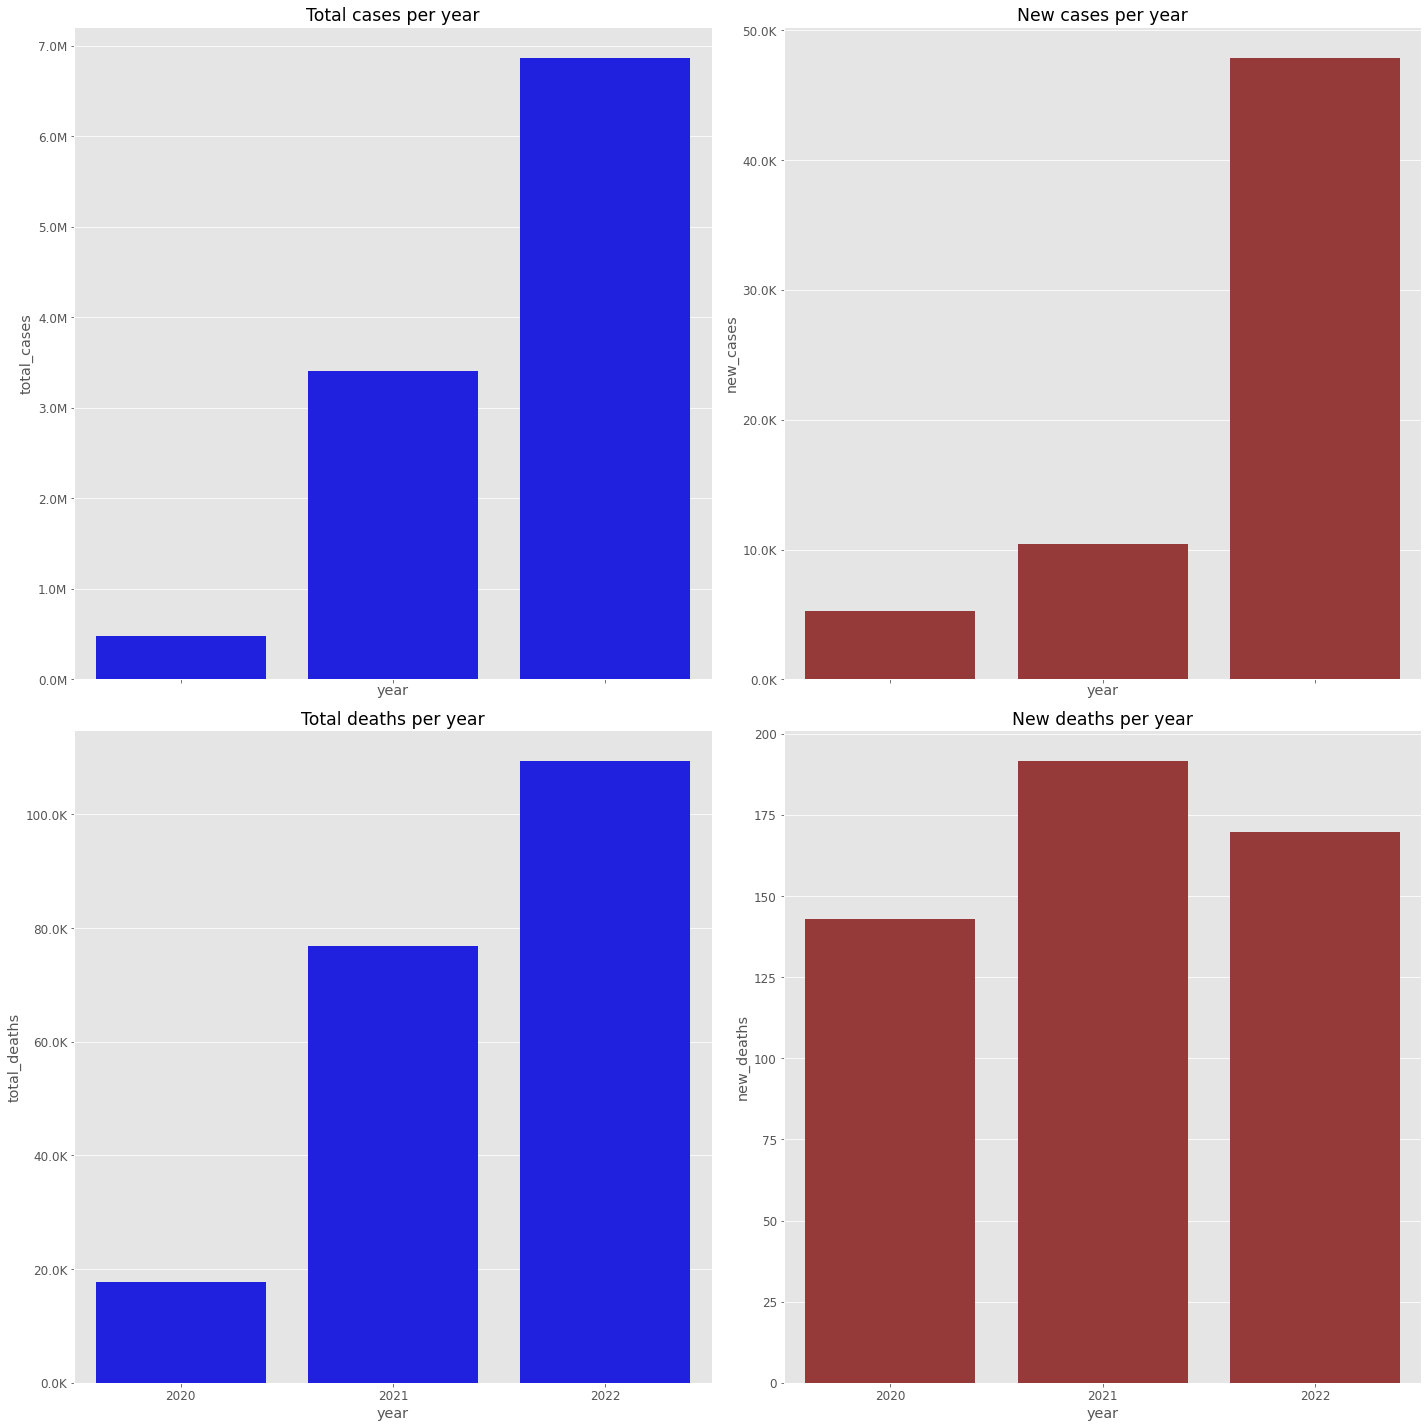

In [13]:
# initiate matplot figure and axis
figxy, ((axx1, axx2), (axx3, axx4)) = plt.subplots(2, 2, sharex=True)

# create bar charts of total cases per year
sns.barplot(x='year', y='total_cases', color='blue', ci=None, data=df, ax=axx1)
axx1.set(ylabel='total_cases', title='Total cases per year')
axx1.yaxis.set_major_formatter(format_mill)

# create bar charts of new cases per year
sns.barplot(x='year', y='new_cases', color='brown', ci=None, data=df, ax=axx2)
axx2.set(ylabel='new_cases', title='New cases per year')
axx2.yaxis.set_major_formatter(format_tsd)

# create bar charts of total deaths per year
sns.barplot(x='year', y='total_deaths', color='blue', ci=None, data=df, ax=axx3)
axx3.set(ylabel='total_deaths', title='Total deaths per year')
axx3.yaxis.set_major_formatter(format_tsd)

# create bar charts new of deaths per year
sns.barplot(x='year', y='new_deaths', color='brown', ci=None, data=df, ax=axx4)
axx4.set(ylabel='new_deaths', title='New deaths per year')

[Text(0, 0.5, 'new_deaths'), Text(0.5, 1.0, 'New deaths by day name')]

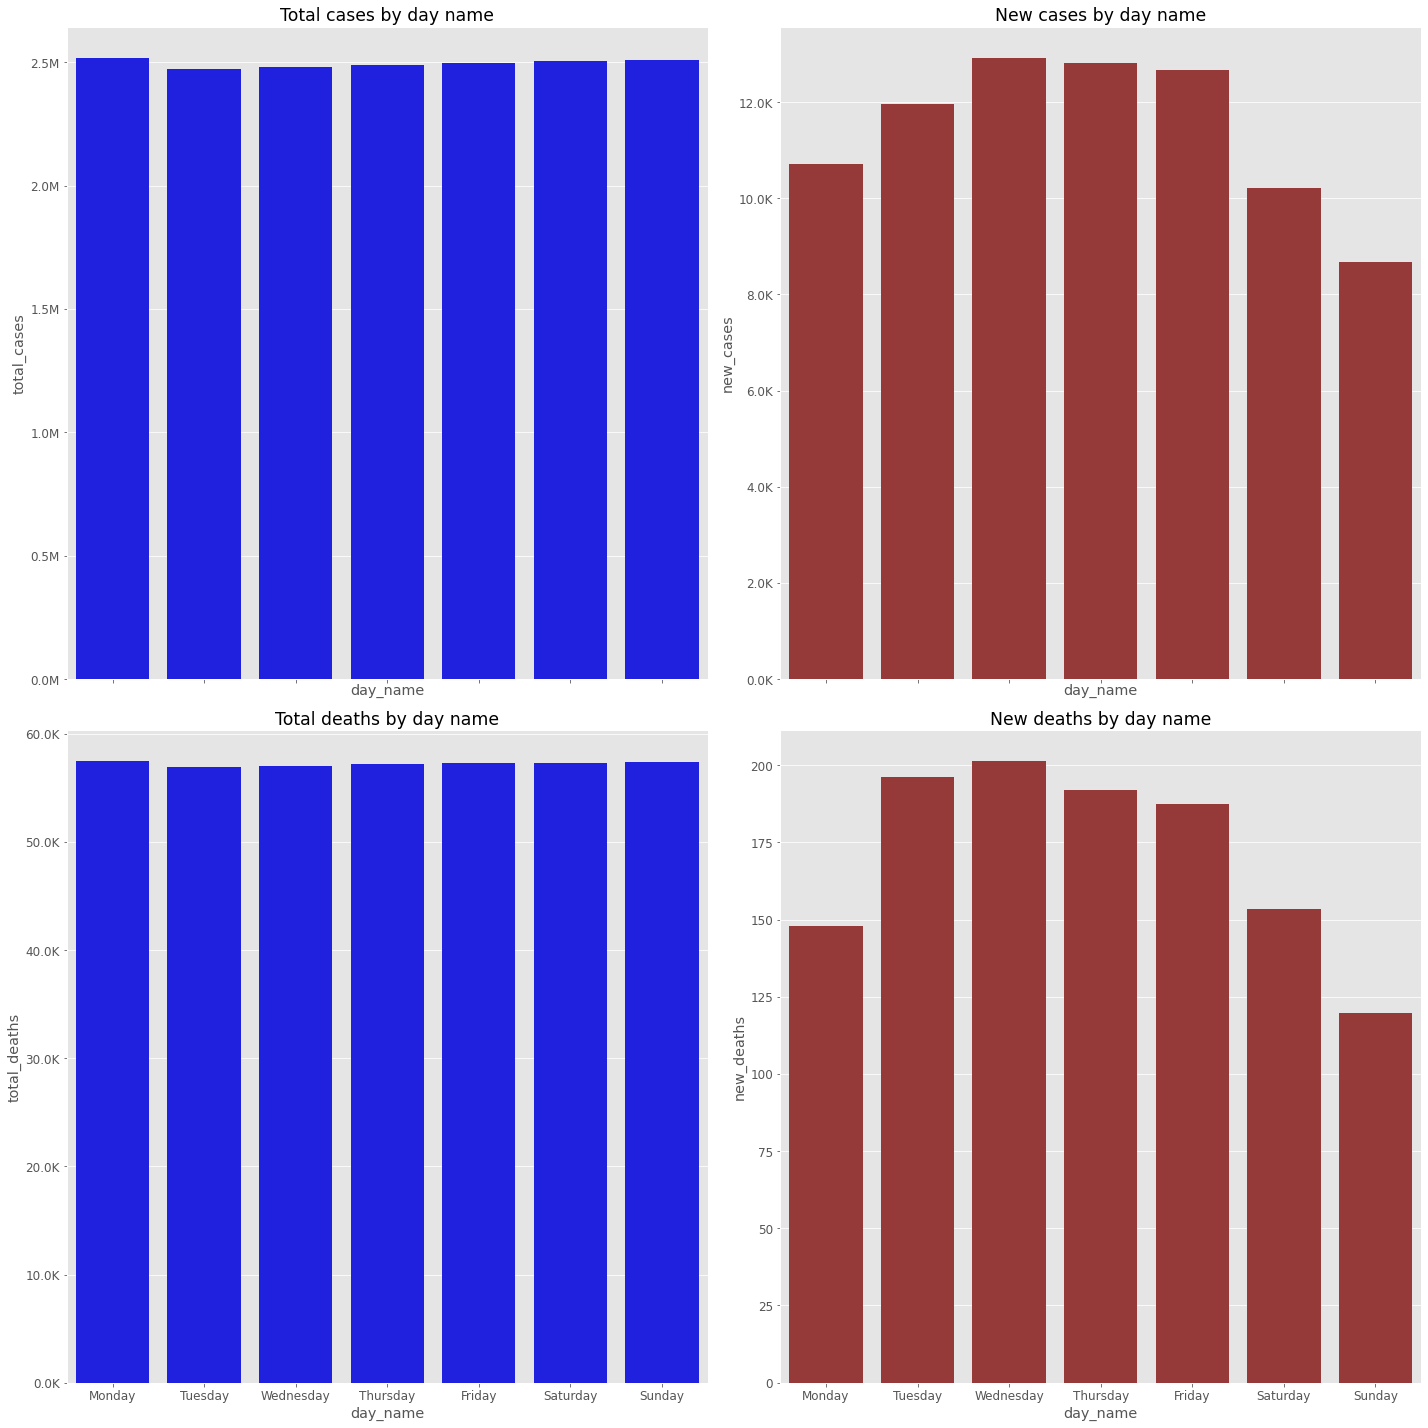

In [14]:
# initiate matplot figure and axis
figxdn, ((axx1, axx2), (axx3, axx4)) = plt.subplots(2, 2, sharex=True)

# create bar charts of total cases by day name
sns.barplot(x='day_name', y='total_cases', color='blue', ci=None, data=df, ax=axx1)
axx1.set(ylabel='total_cases', title='Total cases by day name')
axx1.yaxis.set_major_formatter(format_mill)

# create bar charts of new cases by day name
sns.barplot(x='day_name', y='new_cases', color='brown', ci=None, data=df, ax=axx2)
axx2.set(ylabel='new_cases', title='New cases by day name')
axx2.yaxis.set_major_formatter(format_tsd)

# create bar charts of total deaths by day name
sns.barplot(x='day_name', y='total_deaths', color='blue', ci=None, data=df, ax=axx3)
axx3.set(ylabel='total_deaths', title='Total deaths by day name')
axx3.yaxis.set_major_formatter(format_tsd)

# create bar charts new of deaths by day name
sns.barplot(x='day_name', y='new_deaths', color='brown', ci=None, data=df, ax=axx4)
axx4.set(ylabel='new_deaths', title='New deaths by day name')

# Missing Data Exploration

In [15]:
df.isna().sum()                                           # over 50 % missing data in some columns

iso_code                                        0
continent                                    9891
location                                        0
date                                            0
total_cases                                  3030
                                            ...  
excess_mortality_cumulative_per_million    159484
day_name                                        0
day                                             0
month                                           0
year                                            0
Length: 71, dtype: int64

Strategies for handling missing values: Using ffill()-forwardfill: according to the next observed value  OR bfill()-backfill: according to the last observed value 

In [16]:
df.bfill().isna().sum()                                   # 6126 rows still missing with the backward fill strategy

iso_code                                      0
continent                                     0
location                                      0
date                                          0
total_cases                                   0
                                           ... 
excess_mortality_cumulative_per_million    6126
day_name                                      0
day                                           0
month                                         0
year                                          0
Length: 71, dtype: int64

In [17]:
df.ffill().isna().sum()                                   # 1487 rows missing with the forward fill strategy

iso_code                                      0
continent                                     0
location                                      0
date                                          0
total_cases                                   0
                                           ... 
excess_mortality_cumulative_per_million    1487
day_name                                      0
day                                           0
month                                         0
year                                          0
Length: 71, dtype: int64

In [18]:
df_ffill = df.ffill()
df_ffill.isna().sum()

iso_code                                      0
continent                                     0
location                                      0
date                                          0
total_cases                                   0
                                           ... 
excess_mortality_cumulative_per_million    1487
day_name                                      0
day                                           0
month                                         0
year                                          0
Length: 71, dtype: int64

In [19]:
df_ffill.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,day,month,year
count,1.651800e+05,1.651800e+05,1.651750e+05,1.651520e+05,165152.000000,165152.000000,165180.000000,165180.000000,165175.000000,165152.000000,...,165180.000000,165180.000000,165180.000000,1.636930e+05,163693.000000,163693.000000,163693.000000,165180.000000,165180.000000,165180.000000
mean,2.488950e+06,1.142554e+04,1.158035e+04,5.643936e+04,158.192368,158.827925,29656.548117,167.852918,172.368592,566.947183,...,3.005906,73.482784,0.722305,6.863073e+04,13.355385,24.859429,1661.102086,15.817339,6.522818,2020.678278
std,1.502540e+07,8.294593e+04,8.168798e+04,2.957866e+05,789.548818,772.358465,51016.130209,680.470069,545.757959,828.871268,...,2.483058,7.415484,0.150566,2.064114e+05,14.499356,35.772052,2118.958575,8.794461,3.469783,0.619171
min,1.000000e+00,-7.434700e+04,-6.223000e+03,1.000000e+00,-1918.000000,-232.143000,0.001000,-13876.282000,-1936.106000,0.000000,...,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1826.595723,1.000000,1.000000,2020.000000
25%,2.073000e+03,1.000000e+00,7.000000e+00,8.500000e+01,0.000000,0.143000,651.363000,0.059000,1.637000,23.191500,...,1.200000,68.370000,0.594000,1.420000e+02,2.530000,1.120000,170.863057,8.000000,4.000000,2020.000000
50%,2.763200e+04,8.000000e+01,1.075710e+02,8.520000e+02,2.000000,2.000000,4949.360000,11.942000,19.525000,163.619500,...,2.320000,75.000000,0.740000,5.249600e+03,11.360000,15.030000,1017.459621,16.000000,7.000000,2021.000000
75%,3.046545e+05,1.068000e+03,1.186143e+03,7.800000e+03,19.000000,20.000000,39538.212250,101.313000,128.339500,835.020000,...,4.000000,78.880000,0.845000,3.875630e+04,23.470000,45.800000,2574.351715,23.000000,10.000000,2021.000000
max,4.369819e+08,4.205408e+06,3.444963e+06,5.956509e+06,18058.000000,14705.857000,697959.350000,51427.491000,16052.608000,6315.219000,...,13.800000,86.750000,0.957000,1.080748e+06,111.010000,374.930000,9153.060433,31.000000,12.000000,2022.000000


# Data Visualization

[Text(0.5, 1.0, 'New deaths per day')]

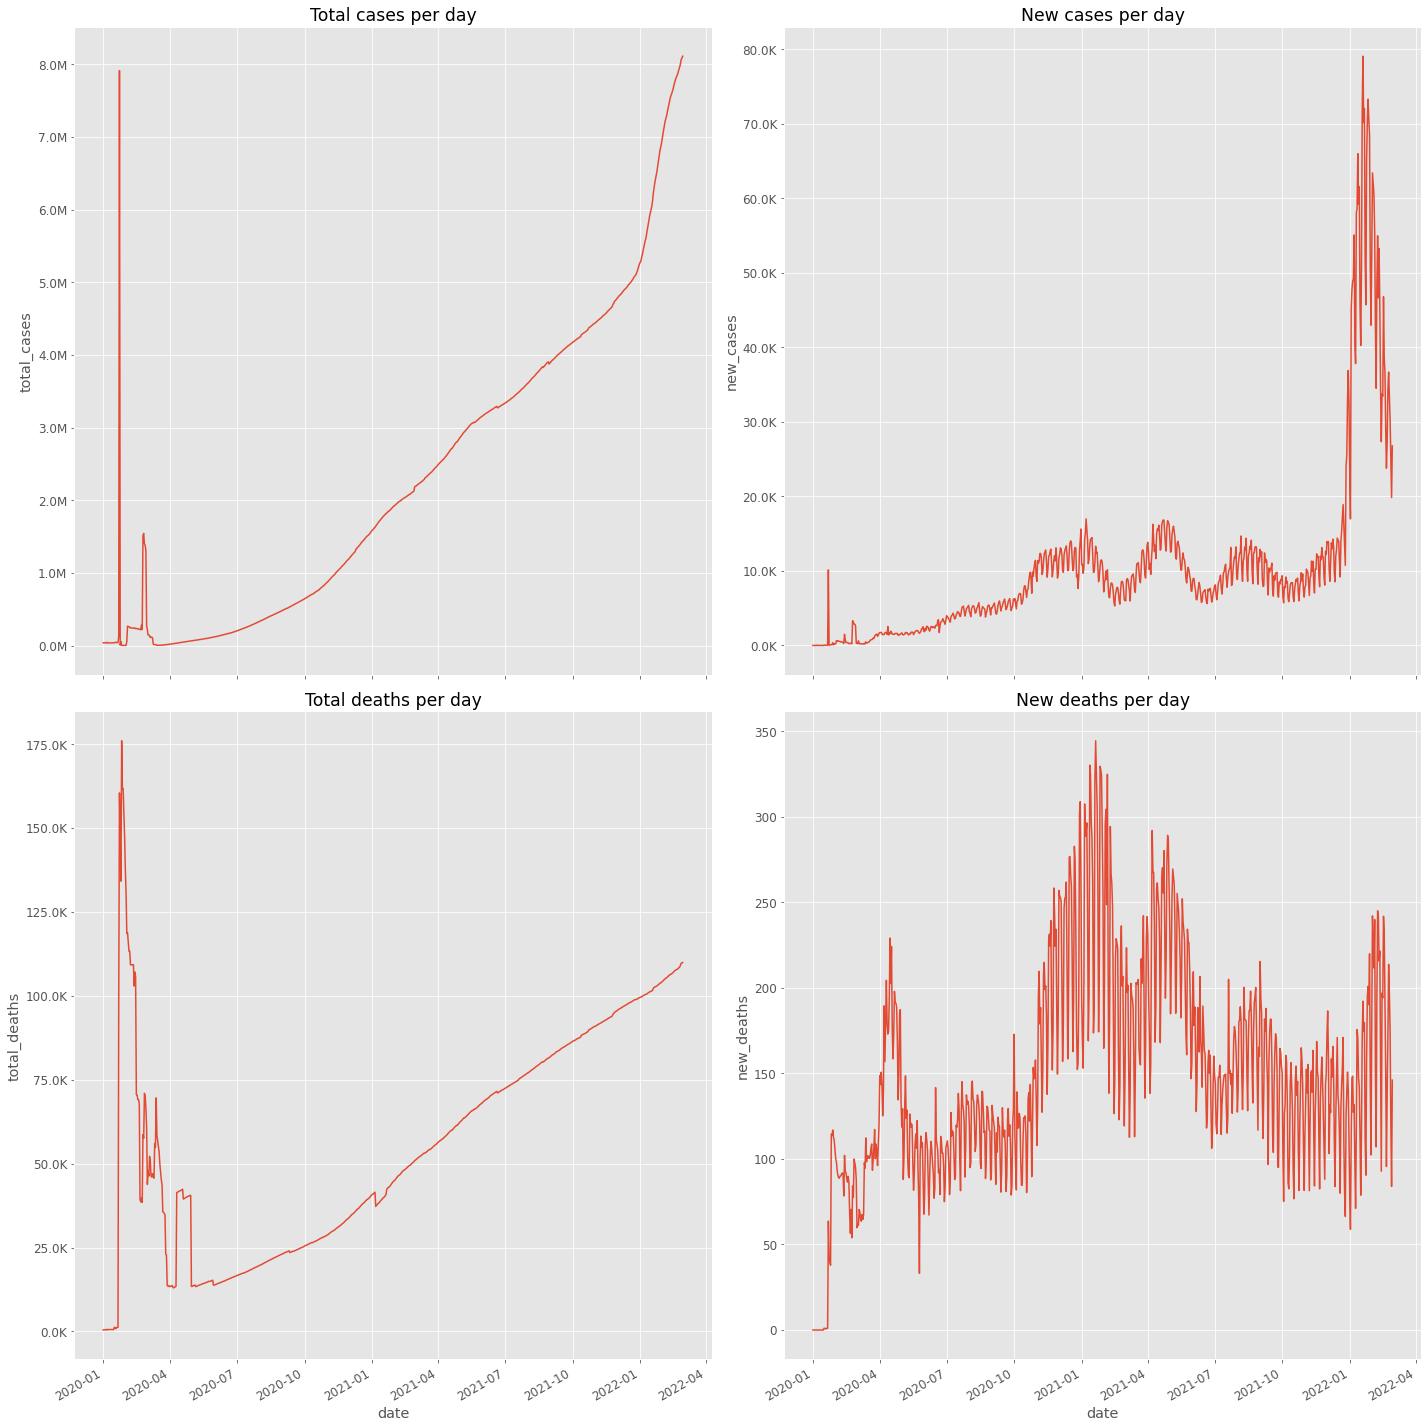

In [20]:
# inititate matplot figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
fig.autofmt_xdate()

# plot total cases for each day
sns.lineplot(x='date', y='total_cases', data=df_ffill, ci=None, ax=ax1)
ax1.set(title='Total cases per day')
ax1.yaxis.set_major_formatter(format_mill)

# plot new cases for each day
sns.lineplot(x='date', y='new_cases', data=df_ffill, ci=None, ax=ax2)
ax2.set(title='New cases per day')
ax2.yaxis.set_major_formatter(format_tsd)

# plot total deaths for each day
sns.lineplot(x='date', y='total_deaths', data=df_ffill, ci=None, ax=ax3)
ax3.set(title='Total deaths per day')
ax3.yaxis.set_major_formatter(format_tsd)

# plot new deaths for each day
sns.lineplot(x='date', y='new_deaths', data=df_ffill, ci=None, ax=ax4)
ax4.set(title='New deaths per day')

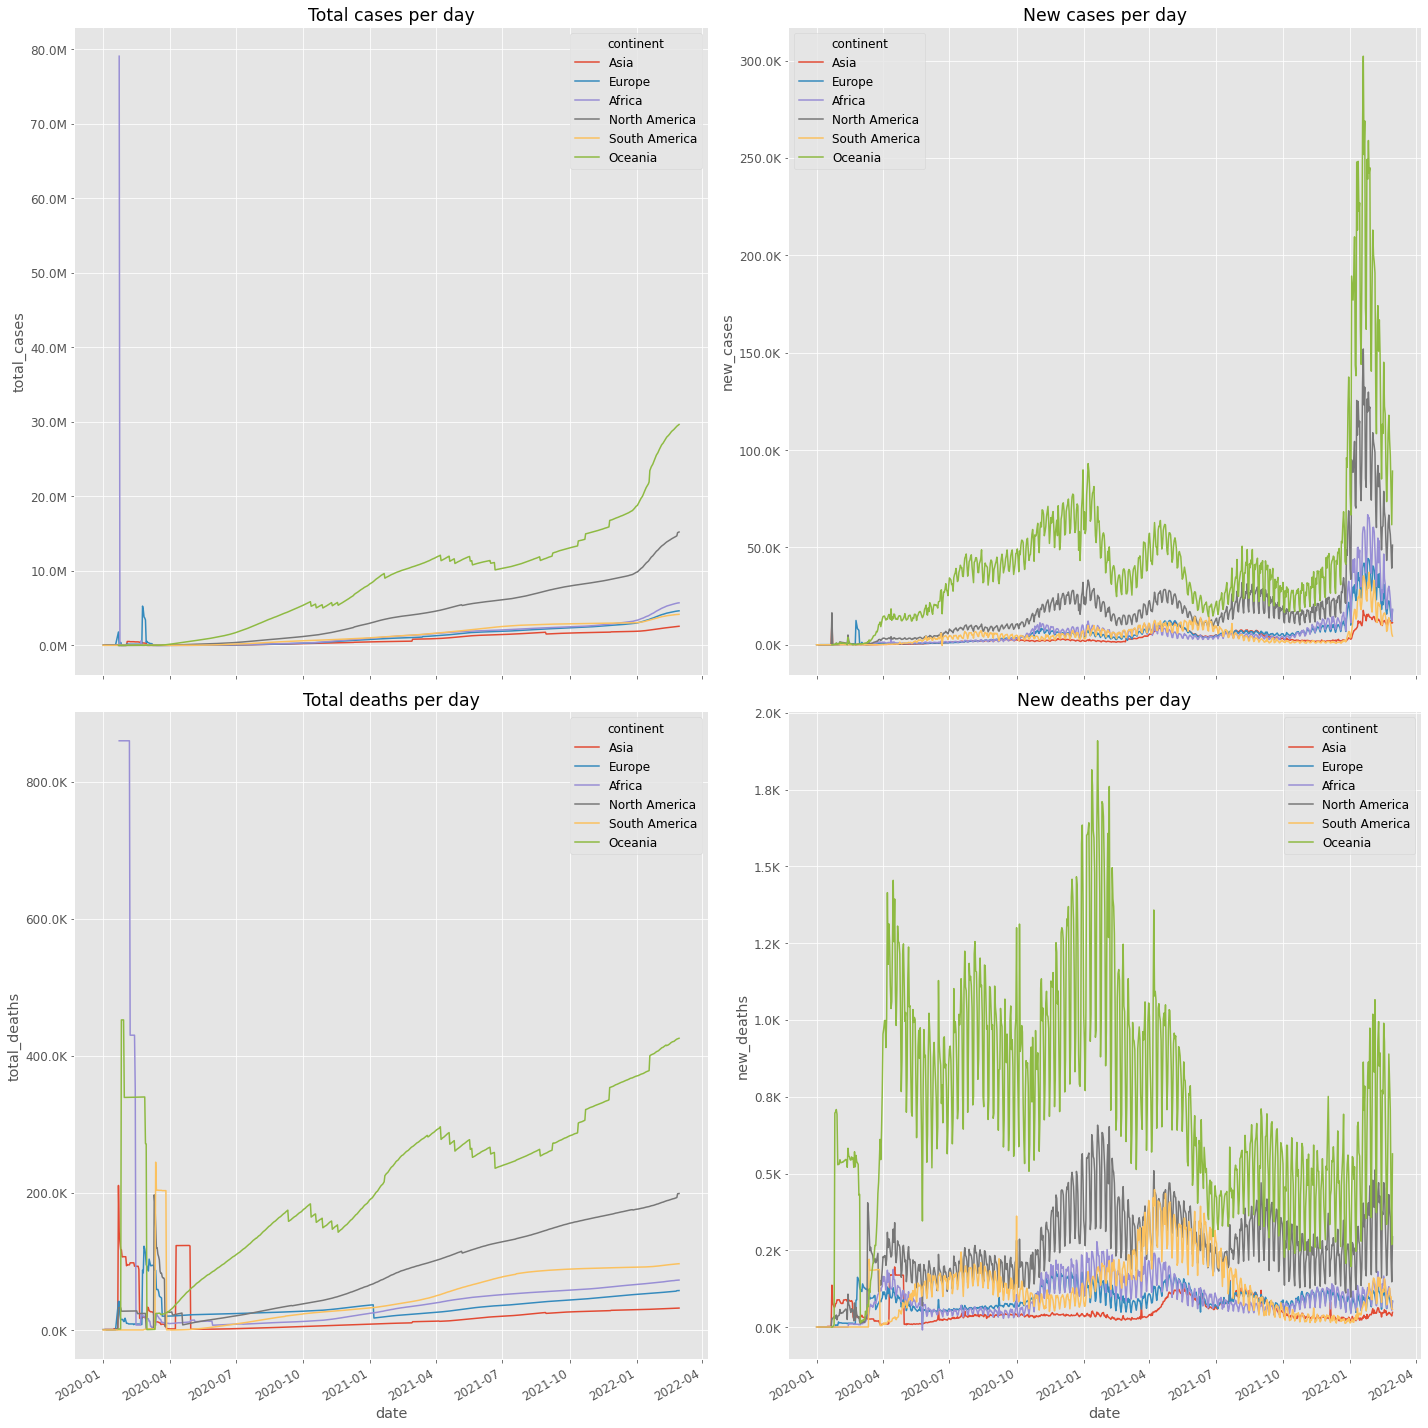

In [21]:
# inititate matplot figure
fig1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
fig1.autofmt_xdate()

# plot total cases for each day
sns.lineplot(x='date', y='total_cases', data=df_ffill, ci=None, ax=ax1, hue='continent')
ax1.set(title='Total cases per day')
ax1.yaxis.set_major_formatter(format_mill)

# plot new cases for each day
sns.lineplot(x='date', y='new_cases', data=df_ffill, ci=None, ax=ax2, hue='continent')
ax2.set(title='New cases per day')
ax2.yaxis.set_major_formatter(format_tsd)

# plot total deaths for each day
sns.lineplot(x='date', y='total_deaths', data=df_ffill, ci=None, ax=ax3, hue='continent')
ax3.set(title='Total deaths per day')
ax3.yaxis.set_major_formatter(format_tsd)

# plot new deaths for each day
sns.lineplot(x='date', y='new_deaths', data=df_ffill, ci=None, ax=ax4, hue='continent')
ax4.set(title='New deaths per day')
ax4.yaxis.set_major_formatter(format_tsd)

# Date Resampling

Convert time series to weekly frequency

[Text(0.5, 1.0, 'New deaths per week')]

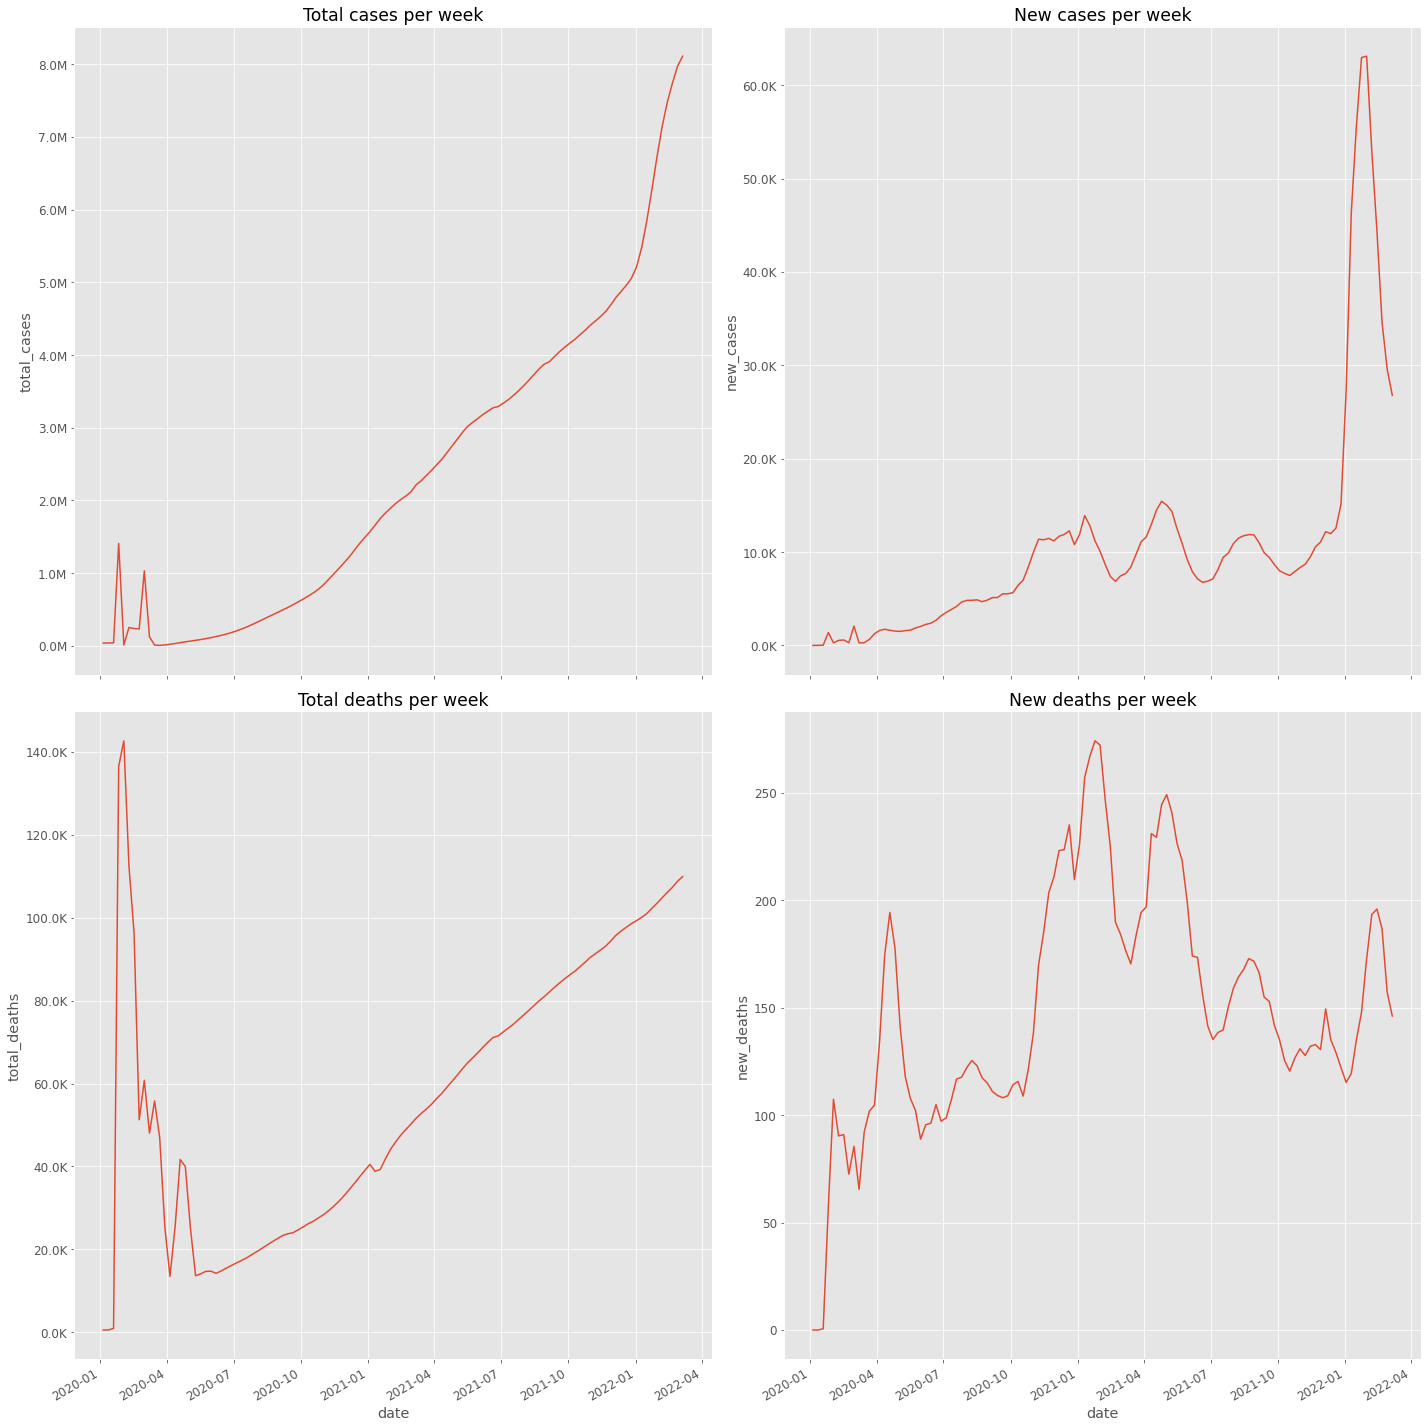

In [22]:
# inititate matplot figure
fig2, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
fig2.autofmt_xdate()

# plot total cases for each week
sns.lineplot(x='date', y='total_cases', data=df_ffill.set_index('date').resample('W').mean(), ci=None, ax=ax1)   
ax1.set(title='Total cases per week')
ax1.yaxis.set_major_formatter(format_mill)

# plot new cases for each week
sns.lineplot(x='date', y='new_cases', data=df_ffill.set_index('date').resample('W').mean(), ci=None, ax=ax2)    
ax2.set(title='New cases per week')
ax2.yaxis.set_major_formatter(format_tsd)

# plot total deaths for each week
sns.lineplot(x='date', y='total_deaths', data=df_ffill.set_index('date').resample('W').mean(), ci=None, ax=ax3)
ax3.set(title='Total deaths per week')
ax3.yaxis.set_major_formatter(format_tsd)

# plot new deaths for each week
sns.lineplot(x='date', y='new_deaths', data=df_ffill.set_index('date').resample('W').mean(), ci=None, ax=ax4)
ax4.set(title='New deaths per week')

Convert time series to calendar month begin frequency

[Text(0.5, 1.0, 'New deaths at calendar month begin')]

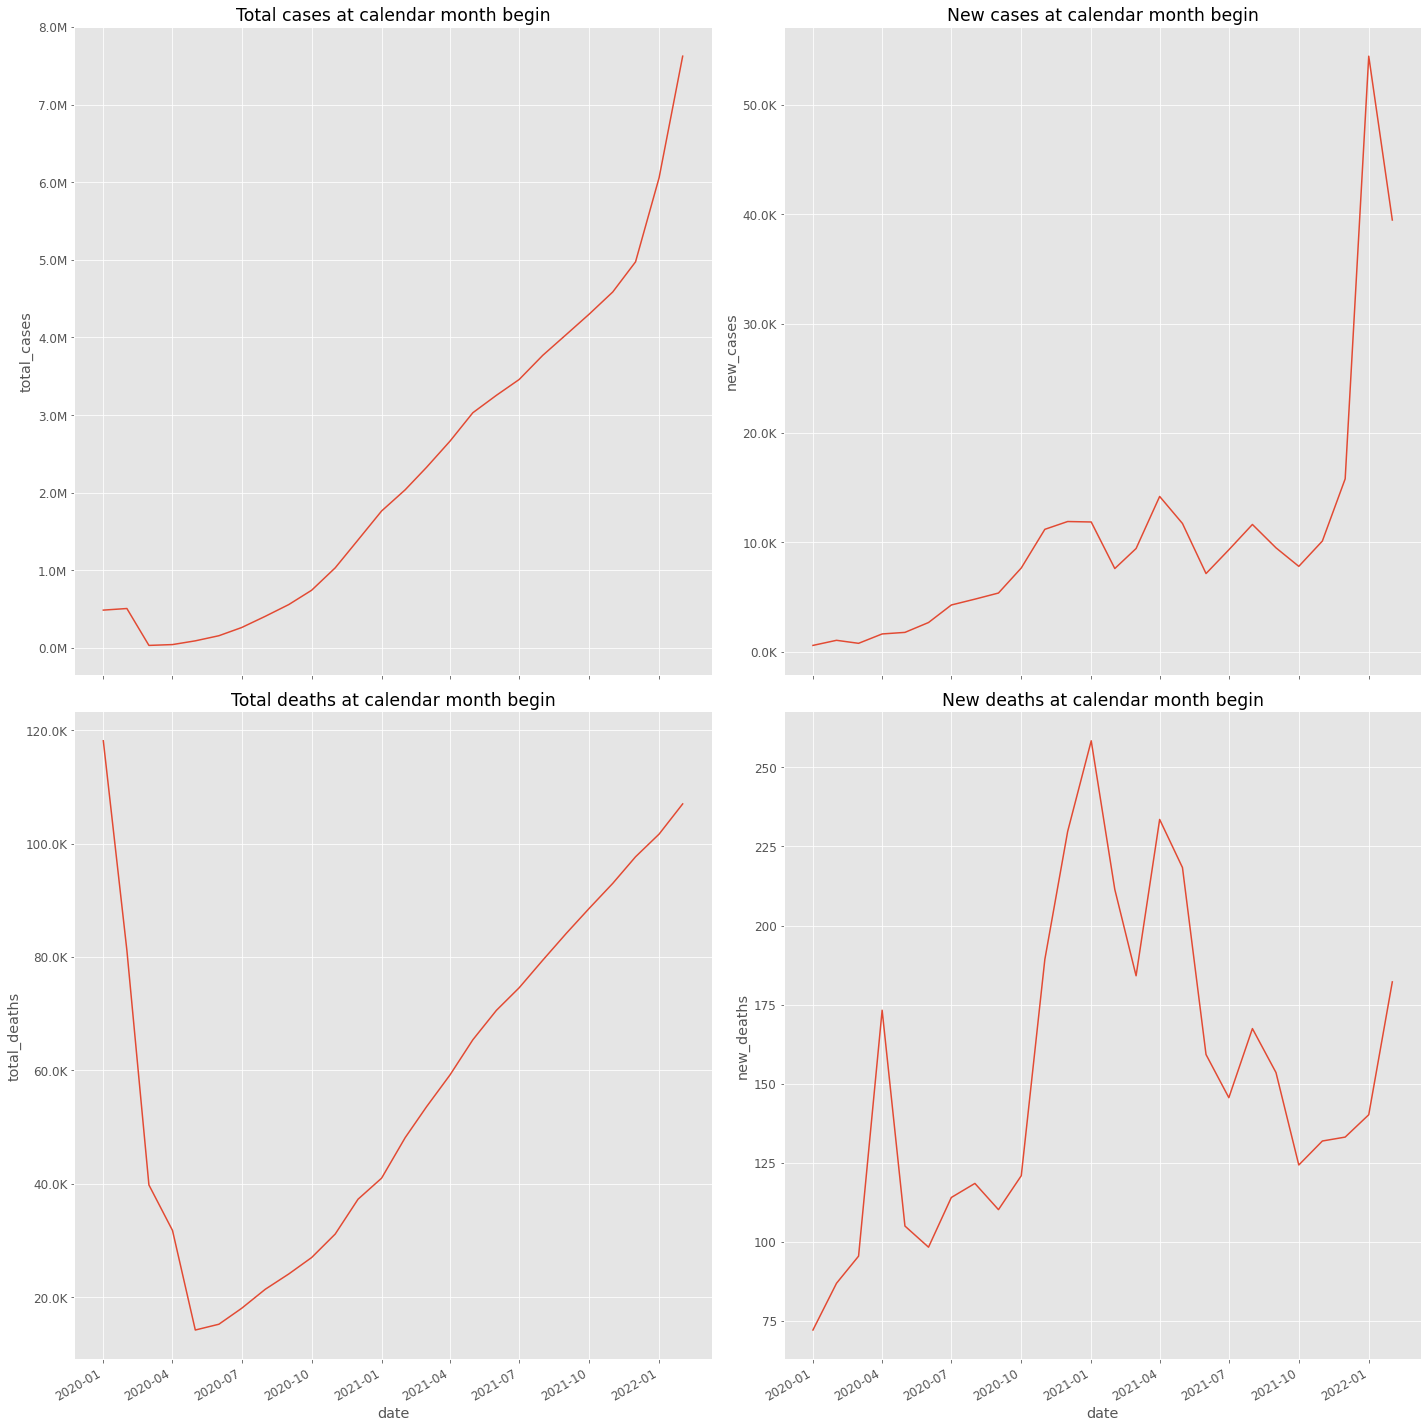

In [23]:
# inititate matplot figure
fig3, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
fig3.autofmt_xdate()

# plot total cases at the beginning of each month
sns.lineplot(x='date', y='total_cases', data=df_ffill.set_index('date').resample('MS').mean(), ci=None, ax=ax1)   
ax1.set(title='Total cases at calendar month begin')
ax1.yaxis.set_major_formatter(format_mill)

# plot new cases at the beginning of each month
sns.lineplot(x='date', y='new_cases', data=df_ffill.set_index('date').resample('MS').mean(), ci=None, ax=ax2)   
ax2.set(title='New cases at calendar month begin')
ax2.yaxis.set_major_formatter(format_tsd)

# plot total deaths at the beginning of each month
sns.lineplot(x='date', y='total_deaths', data=df_ffill.set_index('date').resample('MS').mean(), ci=None, ax=ax3)   
ax3.set(title='Total deaths at calendar month begin')
ax3.yaxis.set_major_formatter(format_tsd)

# plot new deaths at the beginning of each month
sns.lineplot(x='date', y='new_deaths', data=df_ffill.set_index('date').resample('MS').mean(), ci=None, ax=ax4)   
ax4.set(title='New deaths at calendar month begin')

Convert time series to 15th (or other day_of_month) and calendar month end frequency

[Text(0.5, 1.0, 'New deaths at SemiMonthEnd')]

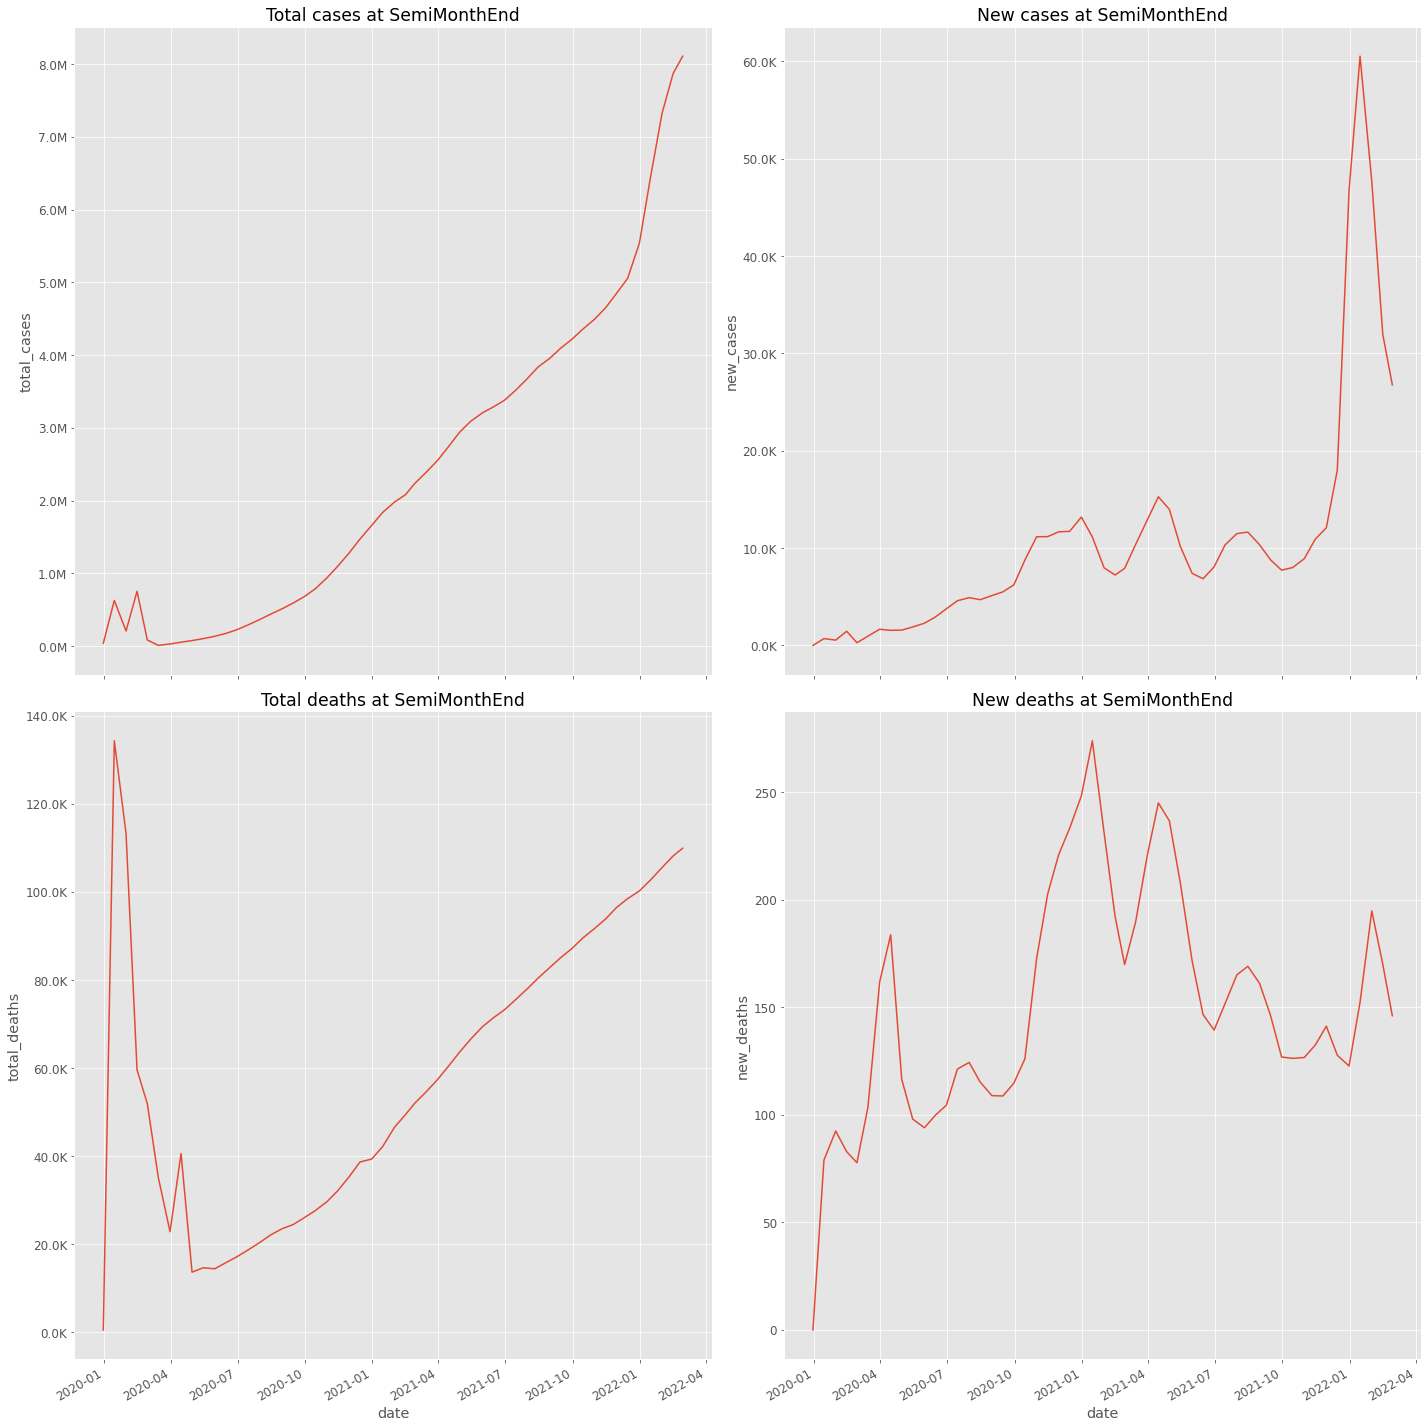

In [24]:
# inititate matplot figure
fig4, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
fig4.autofmt_xdate()

# plot total cases at 15th (or other day_of_month) and calendar month
sns.lineplot(x='date', y='total_cases', data=df_ffill.set_index('date').resample('SM').mean(), ci=None, ax=ax1)   
ax1.set(title='Total cases at SemiMonthEnd')
ax1.yaxis.set_major_formatter(format_mill)

# plot new cases at 15th (or other day_of_month) and calendar month
sns.lineplot(x='date', y='new_cases', data=df_ffill.set_index('date').resample('SM').mean(), ci=None, ax=ax2)   
ax2.set(title='New cases at SemiMonthEnd')
ax2.yaxis.set_major_formatter(format_tsd)

# plot total deaths at 15th (or other day_of_month) and calendar month
sns.lineplot(x='date', y='total_deaths', data=df_ffill.set_index('date').resample('SM').mean(), ci=None, ax=ax3)   
ax3.set(title='Total deaths at SemiMonthEnd')
ax3.yaxis.set_major_formatter(format_tsd)

# plot new deaths at 15th (or other day_of_month) and calendar month
sns.lineplot(x='date', y='new_deaths', data=df_ffill.set_index('date').resample('SM').mean(), ci=None, ax=ax4)   
ax4.set(title='New deaths at SemiMonthEnd')

Convert time series to calendar quarter begin frequency

[Text(0.5, 1.0, 'New deaths at QuarterBegin')]

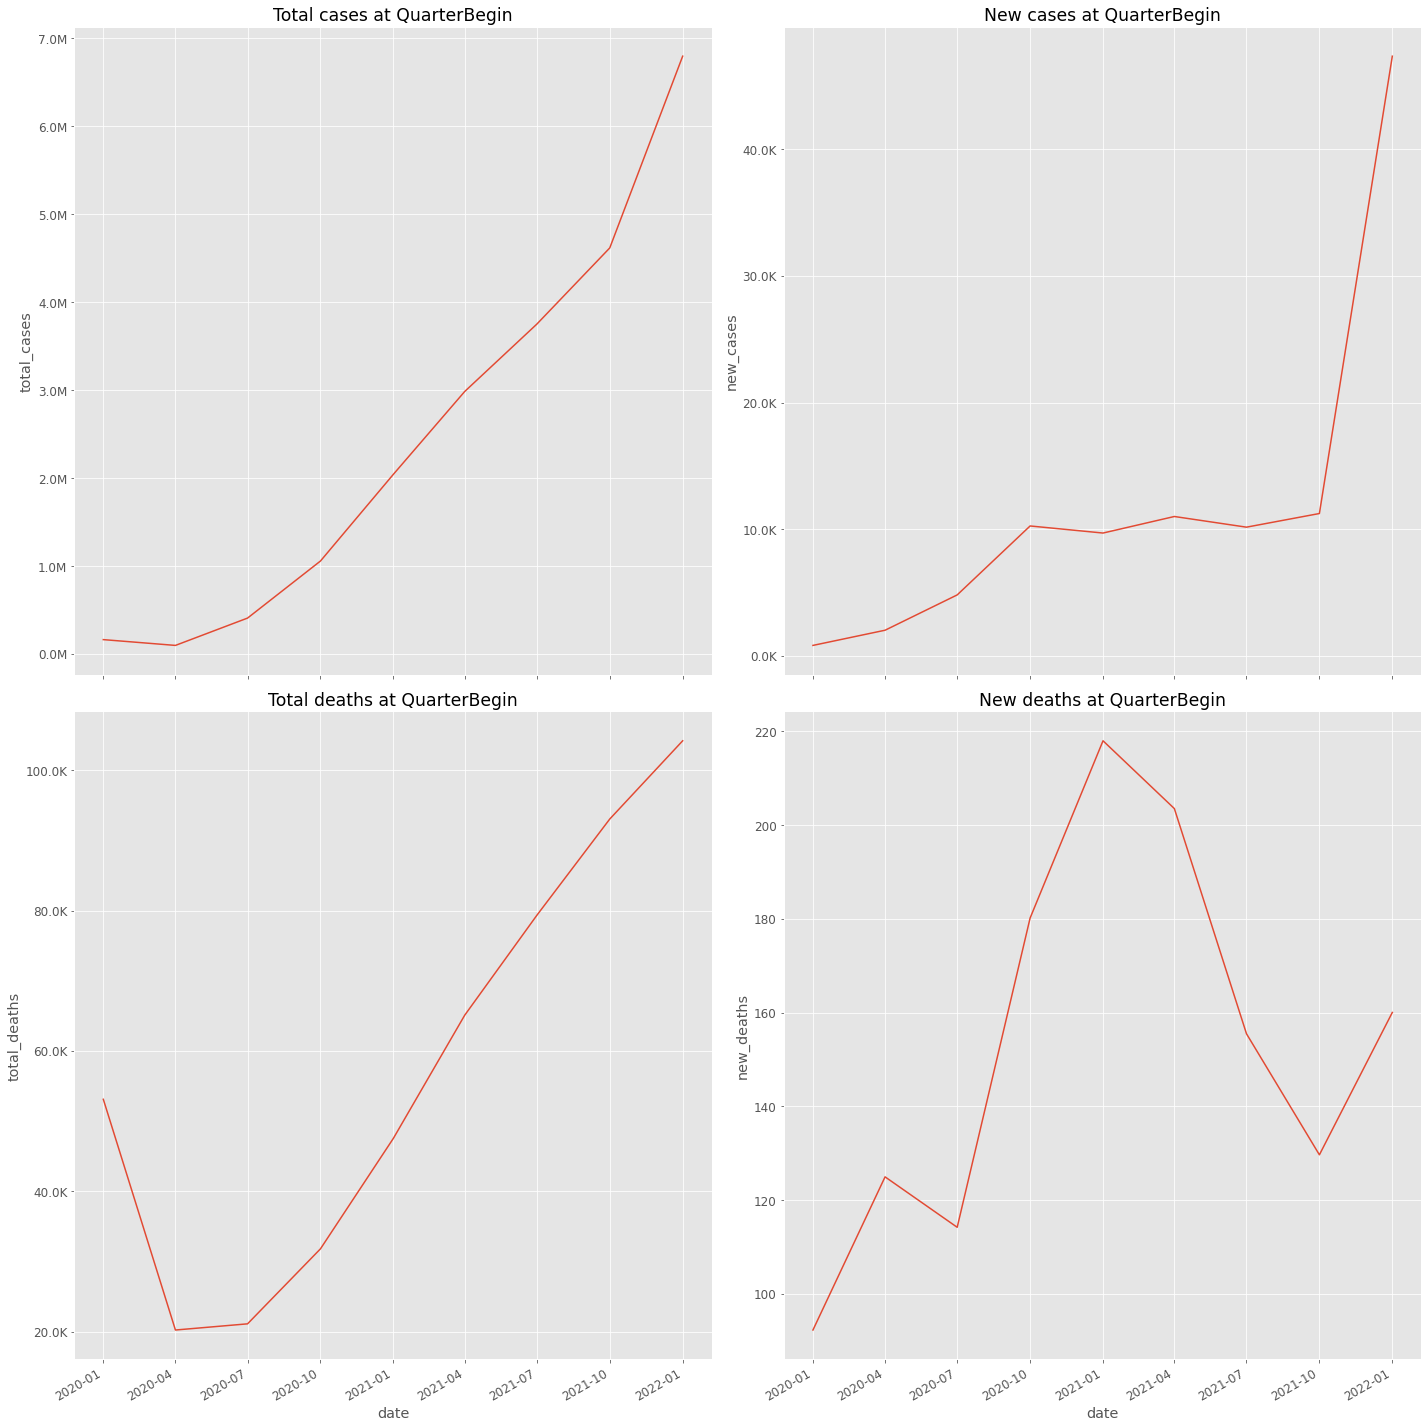

In [25]:
# inititate matplot figure
fig5, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
fig5.autofmt_xdate()

# plot total cases at calendar quarter begin
sns.lineplot(x='date', y='total_cases', data=df_ffill.set_index('date').resample('QS').mean(), ci=None, ax=ax1)   
ax1.set(title='Total cases at QuarterBegin')
ax1.yaxis.set_major_formatter(format_mill)

# plot new cases at calendar quarter begin
sns.lineplot(x='date', y='new_cases', data=df_ffill.set_index('date').resample('QS').mean(), ci=None, ax=ax2)   
ax2.set(title='New cases at QuarterBegin')
ax2.yaxis.set_major_formatter(format_tsd)

# plot total deaths at calendar quarter begin
sns.lineplot(x='date', y='total_deaths', data=df_ffill.set_index('date').resample('QS').mean(), ci=None, ax=ax3)   
ax3.set(title='Total deaths at QuarterBegin')
ax3.yaxis.set_major_formatter(format_tsd)

# plot new deaths at calendar quarter begin
sns.lineplot(x='date', y='new_deaths', data=df_ffill.set_index('date').resample('QS').mean(), ci=None, ax=ax4)   
ax4.set(title='New deaths at QuarterBegin')

Group by Location

In [26]:
df_gpd_loc = df_ffill.set_index('date').groupby('location')
df_gpd_loc.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,day_name,day,month,year
date,,,,,,,,,,,,,,,,,,,,,
2020-02-24,AFG,Asia,Afghanistan,5.0,5.0,NaN,NaN,NaN,NaN,0.126,...,64.83,0.511,NaN,NaN,NaN,NaN,Monday,24,2,2020
2020-02-25,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,64.83,0.511,NaN,NaN,NaN,NaN,Tuesday,25,2,2020
2020-02-26,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,64.83,0.511,NaN,NaN,NaN,NaN,Wednesday,26,2,2020
2020-02-27,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,64.83,0.511,NaN,NaN,NaN,NaN,Thursday,27,2,2020
2020-02-28,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,64.83,0.511,NaN,NaN,NaN,NaN,Friday,28,2,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-20,ZWE,Africa,Zimbabwe,1.0,1.0,212.286,3952.0,0.0,1.0,0.066,...,61.49,0.571,35729.4,11.36,-16.46,1052.853825,Friday,20,3,2020
2020-03-21,ZWE,Africa,Zimbabwe,3.0,2.0,212.286,3952.0,0.0,1.0,0.199,...,61.49,0.571,35729.4,11.36,-16.46,1052.853825,Saturday,21,3,2020
2020-03-22,ZWE,Africa,Zimbabwe,3.0,0.0,212.286,3952.0,0.0,1.0,0.199,...,61.49,0.571,35729.4,11.36,-16.46,1052.853825,Sunday,22,3,2020


In [27]:
# helper function to plot line charts
def plot_line(x, y, hue=None, style=None, data=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None, formatter=None):
    # initiate matplot figure and axis
    fig6, ax = plt.subplots(figsize=(9, 6))
    fig6.autofmt_xdate()

    # plot line chart
    sns.lineplot(
        x=x, y=y, 
        hue=hue, style=style, 
        data=data, ci=ci, 
        ax=ax)

    # plot label
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_line

<function __main__.plot_line(x, y, hue=None, style=None, data=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None, formatter=None)>

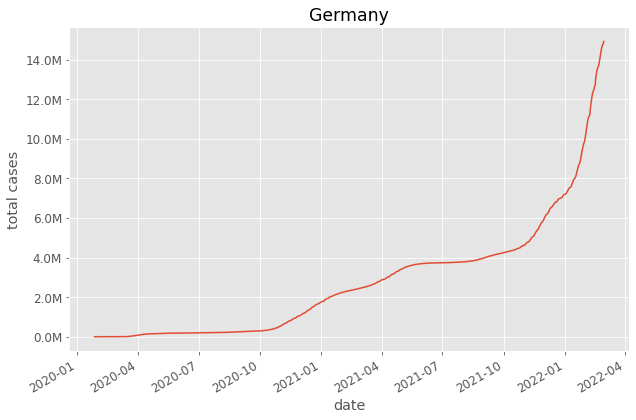

In [28]:
plot_line(
    x='date', y='total_cases', 
    data=df_gpd_loc.get_group('Germany'), 
    xlabel='date', ylabel='total cases', title='Germany',
    formatter=format_mill
)

<function __main__.plot_line(x, y, hue=None, style=None, data=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None, formatter=None)>

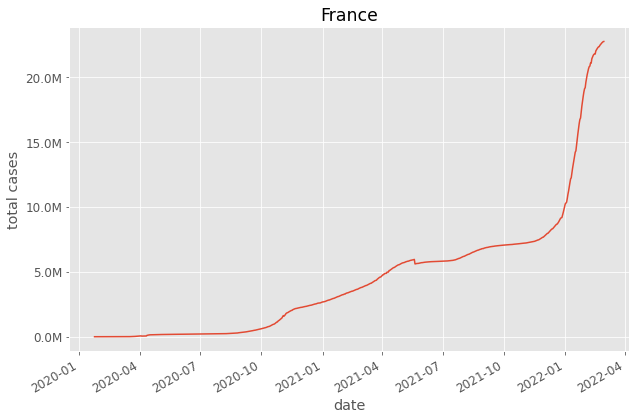

In [29]:
plot_line(
    x='date', y='total_cases', 
    data=df_gpd_loc.get_group('France'), 
    xlabel='date', ylabel='total cases', title='France',
    formatter=format_mill
)

<function __main__.plot_line(x, y, hue=None, style=None, data=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None, formatter=None)>

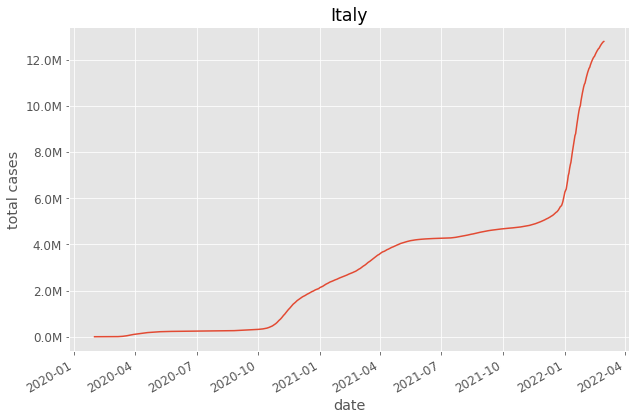

In [30]:
plot_line(
    x='date', y='total_cases', 
    data=df_gpd_loc.get_group('Italy'), 
    xlabel='date', ylabel='total cases', title='Italy',
    formatter=format_mill
)

<function __main__.plot_line(x, y, hue=None, style=None, data=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None, formatter=None)>

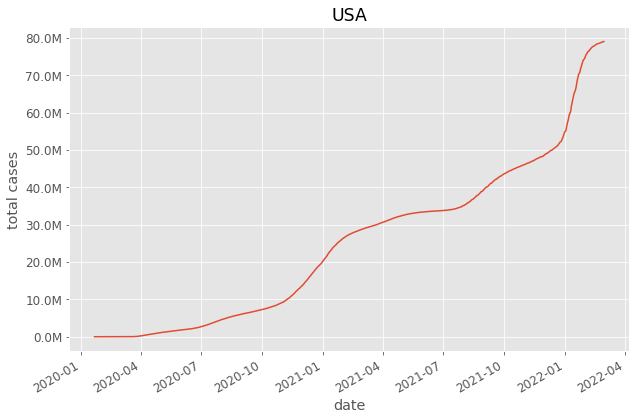

In [31]:
plot_line(
    x='date', y='total_cases', 
    data=df_gpd_loc.get_group('United States'), 
    xlabel='date', ylabel='total cases', title='USA',
    formatter=format_mill
)

# Date Truncating or Indexing

In [32]:
# helper function to get country and selected dates
def get_country(data, ascending=None, before=None, after=None, country=str):
    return data.set_index('date').sort_index(ascending=ascending).truncate(before=before, after=after).groupby('location').get_group(country)

# helper function to plot line chart
def plot_line_rng(data, x, y, title=None, xlabel=None, ylabel=None, formatter=None):
    fig, ax = plt.subplots(figsize=(9, 6))
    fig.autofmt_xdate()

    # plot line
    sns.lineplot(
        data=data,
        x=x, y=y,
        ci=None, ax=ax
    )

    # label plot axis
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set x-axis limit
    ax.set_xlim([data.index.min(), data.index.max()])

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

    return plot_line_rng

<function __main__.plot_line_rng(data, x, y, title=None, xlabel=None, ylabel=None, formatter=None)>

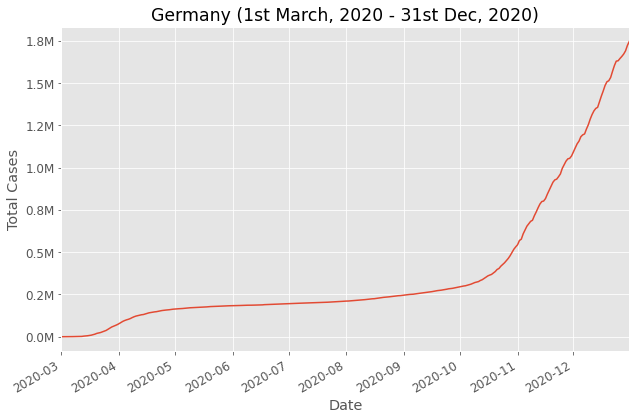

In [33]:
plot_line_rng(
    data=get_country(data=df_ffill, ascending=True, before='2020-03-01', after='2020-12-31', country='Germany'),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Germany (1st March, 2020 - 31st Dec, 2020)', 
    formatter=format_mill  
)

<function __main__.plot_line_rng(data, x, y, title=None, xlabel=None, ylabel=None, formatter=None)>

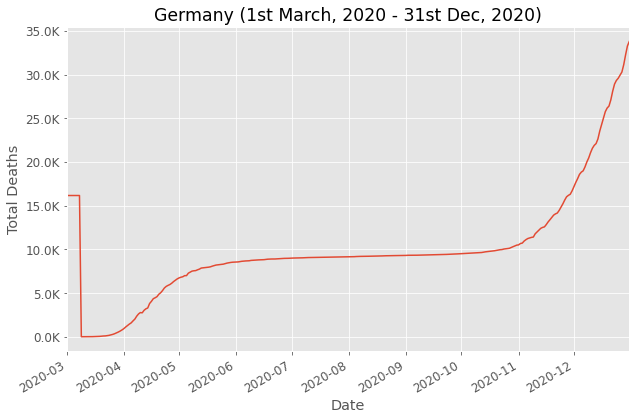

In [34]:
plot_line_rng(
    data=get_country(data=df_ffill, ascending=True, before='2020-03-01', after='2020-12-31', country='Germany'),
    x='date', y='total_deaths',
    xlabel='Date', ylabel='Total Deaths', title='Germany (1st March, 2020 - 31st Dec, 2020)', 
    formatter=format_tsd  
)

<function __main__.plot_line_rng(data, x, y, title=None, xlabel=None, ylabel=None, formatter=None)>

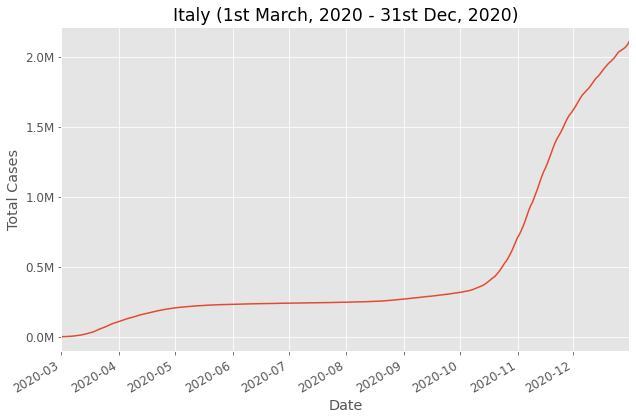

In [35]:
plot_line_rng(
    data=get_country(data=df_ffill, ascending=True, before='2020-03-01', after='2020-12-31', country='Italy'),
    x='date', y='total_cases',
    xlabel='Date', ylabel='Total Cases', title='Italy (1st March, 2020 - 31st Dec, 2020)',
    formatter=format_mill  
)

<function __main__.plot_line_rng(data, x, y, title=None, xlabel=None, ylabel=None, formatter=None)>

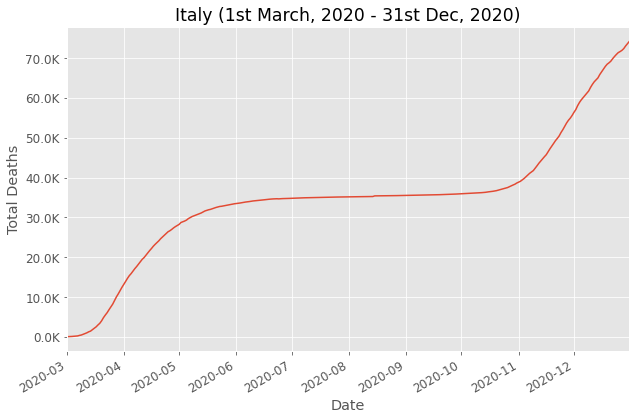

In [36]:
plot_line_rng(
    data=get_country(data=df_ffill, ascending=True, before='2020-03-01', after='2020-12-31', country='Italy'),
    x='date', y='total_deaths',
    xlabel='Date', ylabel='Total Deaths', title='Italy (1st March, 2020 - 31st Dec, 2020)', 
    formatter=format_tsd  
)

In [37]:
filt_data_day = df_gpd_loc[['location', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'day_name']]
filt_data_day.head()

,location,total_cases,new_cases,total_deaths,new_deaths,day_name
date,,,,,,
2020-02-24,Afghanistan,5.0,5.0,NaN,NaN,Monday
2020-02-25,Afghanistan,5.0,0.0,NaN,NaN,Tuesday
2020-02-26,Afghanistan,5.0,0.0,NaN,NaN,Wednesday
2020-02-27,Afghanistan,5.0,0.0,NaN,NaN,Thursday
2020-02-28,Afghanistan,5.0,0.0,NaN,NaN,Friday
...,...,...,...,...,...,...
2020-03-20,Zimbabwe,1.0,1.0,3952.0,0.0,Friday
2020-03-21,Zimbabwe,3.0,2.0,3952.0,0.0,Saturday
2020-03-22,Zimbabwe,3.0,0.0,3952.0,0.0,Sunday


In [38]:
def plot_bar(data, x, y, hue=None, ci=None, title=None, xlabel=None, ylabel=None, formatter=None):
    # create figure and axis
    fig, ax = plt.subplots(figsize=(9, 6))
    fig.autofmt_xdate()

    # plot bar
    sns.barplot(
        data=data, 
        x=x, y=y, hue=hue,
        ci=ci, ax=ax, 
    )

    # label plot axis
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # set y-axis formatter
    ax.yaxis.set_major_formatter(formatter=formatter)

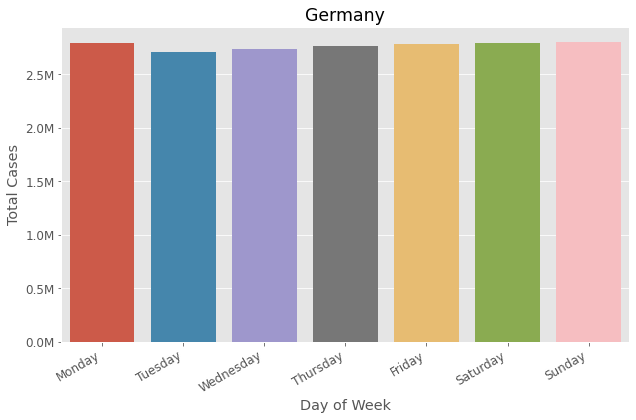

In [39]:
plot_bar(
    data=filt_data_day.get_group('Germany'),
    x='day_name', y='total_cases',
    xlabel='Day of Week', ylabel='Total Cases', title='Germany',
    formatter=format_mill
)

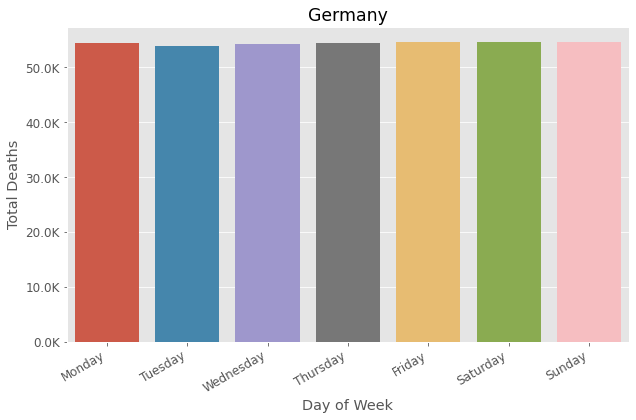

In [40]:
plot_bar(
    data=filt_data_day.get_group('Germany'),
    x='day_name', y='total_deaths',
    xlabel='Day of Week', ylabel='Total Deaths', title='Germany',
    formatter=format_tsd
)

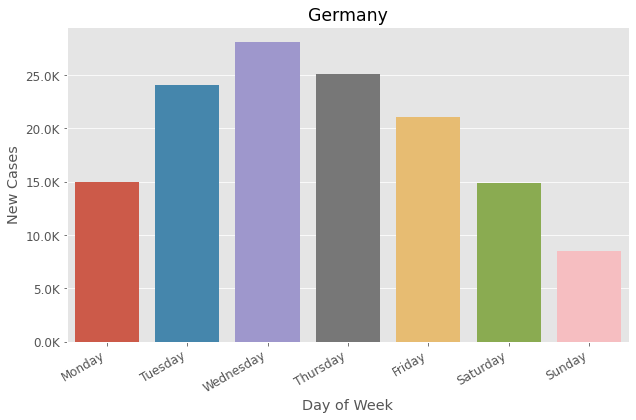

In [41]:
plot_bar(
    data=filt_data_day.get_group('Germany'),
    x='day_name', y='new_cases',
    xlabel='Day of Week', ylabel='New Cases', title='Germany',
    formatter=format_tsd
)

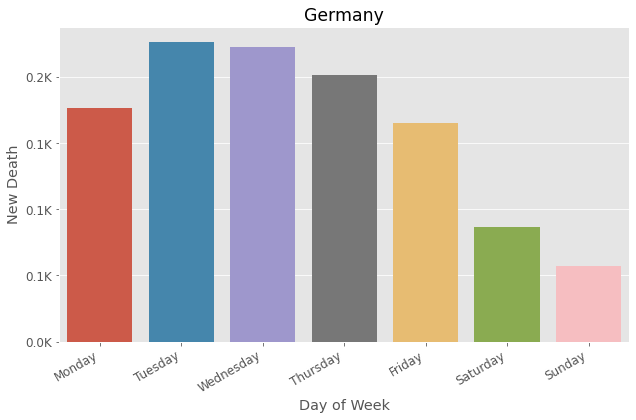

In [42]:
plot_bar(
    data=filt_data_day.get_group('Germany'),
    x='day_name', y='new_deaths',
    xlabel='Day of Week', ylabel='New Death', title='Germany',
    formatter=format_tsd
)

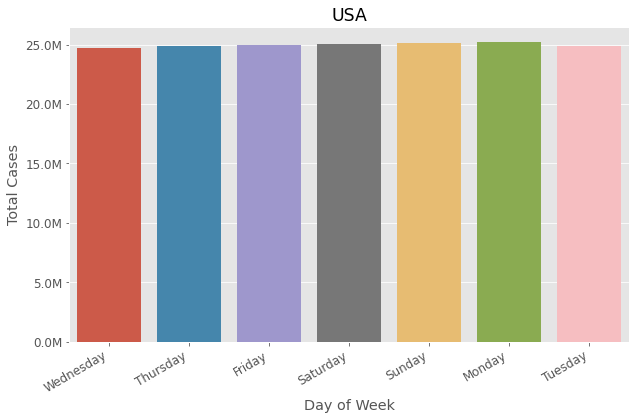

In [43]:
plot_bar(
    data=filt_data_day.get_group('United States'),
    x='day_name', y='total_cases',
    xlabel='Day of Week', ylabel='Total Cases', title='USA',
    formatter=format_mill
)

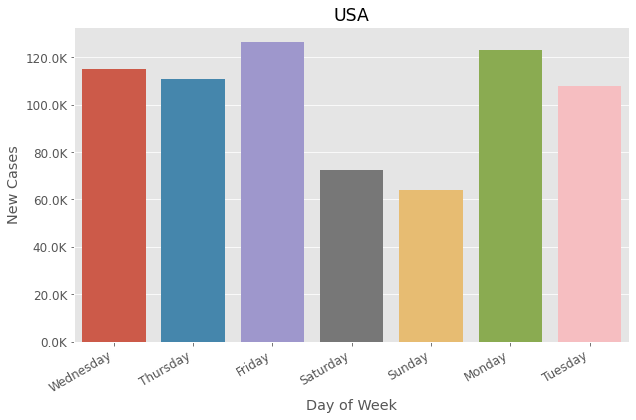

In [44]:
plot_bar(
    data=filt_data_day.get_group('United States'),
    x='day_name', y='new_cases',
    xlabel='Day of Week', ylabel='New Cases', title='USA',
    formatter=format_tsd
)

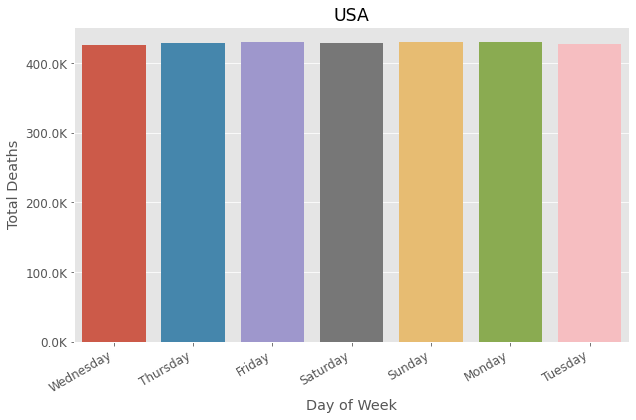

In [45]:
plot_bar(
    data=filt_data_day.get_group('United States'),
    x='day_name', y='total_deaths',
    xlabel='Day of Week', ylabel='Total Deaths', title='USA',
    formatter=format_tsd
)

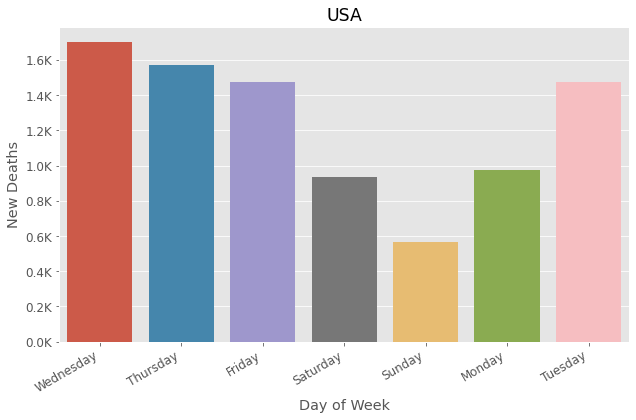

In [46]:
plot_bar(
    data=filt_data_day.get_group('United States'),
    x='day_name', y='new_deaths',
    xlabel='Day of Week', ylabel='New Deaths', title='USA',
    formatter=format_tsd
)